<a href="https://colab.research.google.com/github/Nithin061/UnderDevlopment/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle

In [ ]:
!cp kaggle.json ./kaggle/

In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 230MB/s]
100% 1.06G/1.06G [00:06<00:00, 166MB/s]


In [3]:
!unzip /content/dogs-vs-cats.zip -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./train/dogs/dog.4419.jpg  
  inflating: ./train/dogs/dog.442.jpg  
  inflating: ./train/dogs/dog.4420.jpg  
  inflating: ./train/dogs/dog.4421.jpg  
  inflating: ./train/dogs/dog.4422.jpg  
  inflating: ./train/dogs/dog.4424.jpg  
  inflating: ./train/dogs/dog.4425.jpg  
  inflating: ./train/dogs/dog.4426.jpg  
  inflating: ./train/dogs/dog.4427.jpg  
  inflating: ./train/dogs/dog.4431.jpg  
  inflating: ./train/dogs/dog.4433.jpg  
  inflating: ./train/dogs/dog.4436.jpg  
  inflating: ./train/dogs/dog.4438.jpg  
  inflating: ./train/dogs/dog.4439.jpg  
  inflating: ./train/dogs/dog.444.jpg  
  inflating: ./train/dogs/dog.4440.jpg  
  inflating: ./train/dogs/dog.4441.jpg  
  inflating: ./train/dogs/dog.4442.jpg  
  inflating: ./train/dogs/dog.4443.jpg  
  inflating: ./train/dogs/dog.4444.jpg  
  inflating: ./train/dogs/dog.4445.jpg  
  inflating: ./train/dogs/dog.4446.jpg  
  inflating: ./train/dogs/dog.445.jpg  
  inflati

In [4]:
!pip3 install tensorflow numpy matplotlib keras

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [6]:
dogs_train_path = './dogs_vs_cats/train/dogs'
cats_train_path = './dogs_vs_cats/train/cats'

len(os.listdir(dogs_train_path))
len(os.listdir(cats_train_path))

10000

array([[[220, 225, 224],
        [219, 224, 223],
        [219, 224, 223],
        ...,
        [249, 242, 245],
        [249, 242, 245],
        [249, 242, 245]],

       [[218, 223, 222],
        [218, 223, 222],
        [219, 224, 223],
        ...,
        [251, 245, 246],
        [251, 244, 247],
        [251, 244, 247]],

       [[216, 221, 220],
        [217, 222, 221],
        [217, 222, 221],
        ...,
        [252, 246, 247],
        [253, 247, 248],
        [253, 247, 248]],

       ...,

       [[224, 214, 214],
        [224, 217, 214],
        [219, 214, 211],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]],

       [[224, 215, 211],
        [224, 218, 213],
        [221, 215, 210],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]],

       [[224, 215, 211],
        [224, 218, 213],
        [221, 215, 210],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]]], dtype=uint8)
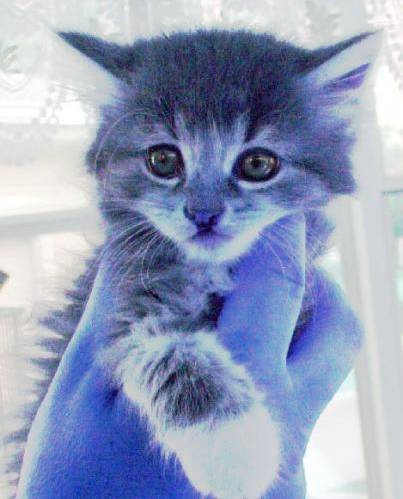

In [7]:
#Loading image
#cv2 and np

import cv2

image = cv2.imread('/content/dogs_vs_cats/train/cats/cat.100.jpg')
image

In [8]:
#Building the model
base_dir = '/content/dogs_vs_cats/train'
train_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.2)
train_generator = train_datagen.flow_from_directory(
       base_dir,
       target_size = (150, 150),
       batch_size = 20,
       class_mode = 'binary',
       subset='training'
)

valid_generator = train_datagen.flow_from_directory(
       base_dir,
       target_size = (150, 150),
       batch_size = 20,
       class_mode = 'binary',
       subset='validation',
       shuffle = False
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
model = models.Sequential([
    #layers 1
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    #layers 2
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    #layers 3
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    #layers 4
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_generator, epochs=3, validation_data = valid_generator)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 71/800 ━━━━━━━━━━━━━━━━━━━━ 11:26 942ms/step - accuracy: 0.4832 - loss: 0.7070